In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../model_fits.csv")

Correlation between Alpha oscillatory power (delay) and Aperiodic exponent (encoding): -0.01644793451426206


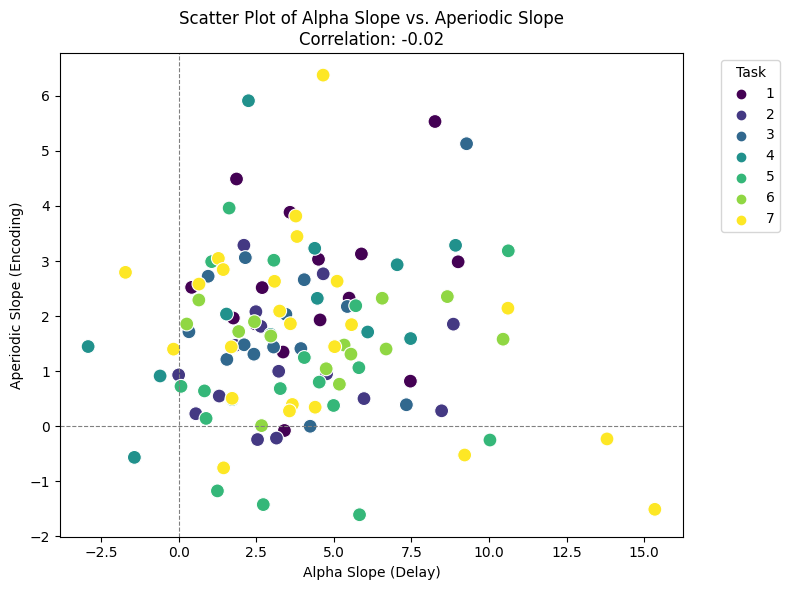

In [3]:
# Filter for Alpha oscillatory power and delay
alpha_df = df[
    (df["Parameter"] == "Alpha oscillatory power")
    & (df["Time Window"] == "delay")
][["Task", "subject", "CTF slope (Z-scored on baseline)"]].rename(
    columns={"CTF slope (Z-scored on baseline)": "Alpha_slope"}
)

# Filter for Aperiodic exponent and encoding
aperiodic_df = df[
    (df["Parameter"] == "Aperiodic exponent")
    & (df["Time Window"] == "encoding")
][["Task", "subject", "CTF slope (Z-scored on baseline)"]].rename(
    columns={"CTF slope (Z-scored on baseline)": "Aperiodic_slope"}
)

# Merge the two filtered DataFrames on Task and subject
merged_df = pd.merge(alpha_df, aperiodic_df, on=["Task", "subject"])

# Calculate correlation
correlation = merged_df[["Alpha_slope", "Aperiodic_slope"]].corr().iloc[0, 1]
print(
    f"Correlation between Alpha oscillatory power (delay) and Aperiodic exponent (encoding): {correlation}"
)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_df,
    x="Alpha_slope",
    y="Aperiodic_slope",
    hue="Task",  # Differentiate by Task if relevant
    palette="viridis",
    s=100,
)
plt.title(
    f"Scatter Plot of Alpha Slope vs. Aperiodic Slope\nCorrelation: {correlation:.2f}"
)
plt.xlabel("Alpha Slope (Delay)")
plt.ylabel("Aperiodic Slope (Encoding)")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.8)
plt.legend(title="Task", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Correlations by Task:
Task
1    0.196261
2    0.028368
3    0.295924
4    0.393629
5    0.048603
6    0.048369
7   -0.404516
Name: Correlation, dtype: float64


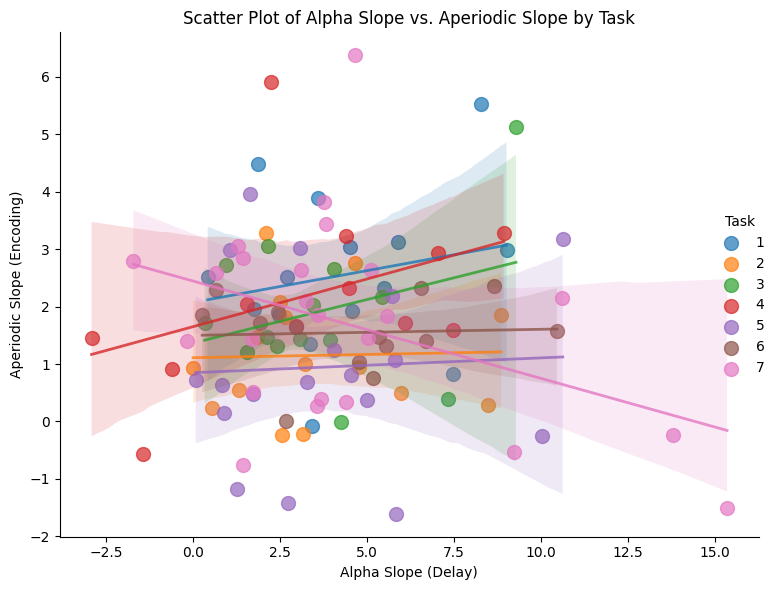

In [4]:
# Group by Task and calculate correlations for each task
correlations_by_task = (
    merged_df.groupby("Task")
    .apply(
        lambda group: group[["Alpha_slope", "Aperiodic_slope"]]
        .corr()
        .iloc[0, 1]
    )
    .rename("Correlation")
)

# Output the correlations for each Task
print("Correlations by Task:")
print(correlations_by_task)

# Create the scatter plot with regression lines
sns.lmplot(
    data=merged_df,
    x="Alpha_slope",
    y="Aperiodic_slope",
    hue="Task",
    height=6,
    aspect=1.2,
    scatter_kws={"s": 100, "alpha": 0.7},  # Adjust scatterplot style
    line_kws={"linewidth": 2, "alpha": 0.8},  # Adjust regression line style
)

# Add plot labels and title
plt.title("Scatter Plot of Alpha Slope vs. Aperiodic Slope by Task")
plt.xlabel("Alpha Slope (Delay)")
plt.ylabel("Aperiodic Slope (Encoding)")
plt.tight_layout()
plt.show()